# 11.3 Date Ranges, Frequencies, and Shifting 

## Frequency

Generic time series in pandas are assumed to be irregular; that is, they have no fixed frequency.  For many applications this is sufficient.  However, it's often desirable to work relative to a fixed frequency, such as **daily, monthly, or every 15 minutes**, even if that means introducing missing values into a time series.

## Resampling

Resampling involves changing the frequency of your time series observations.  
  
Two types of resampling are:  
  
- **Upsampling**: Where you increase the frequency of the samples, such as from minutes to seconds.  This might mean introducing missing values into a time series.
  
- **Downsampling**: Where you decrease the frequency of the samples, such as from days to months.


In [15]:
from pandas import DataFrame, Series
import pandas as pd
from datetime import datetime
import numpy as np
%matplotlib inline

Create time series.  Frequency is not fixed - close to 'every other day'.

In [16]:
# Create time series
ts = Series([0, 1, 2, 3, 4], index=pd.DatetimeIndex([
                                    '11/24/2018', 
                                    '11/26/2018',
                                    '11/28/2018',
                                    '11/30/2018',
                                    '12/3/2018']))
ts

2018-11-24    0
2018-11-26    1
2018-11-28    2
2018-11-30    3
2018-12-03    4
dtype: int64

Resample to daily frequency.  The string 'D' is interpreted as daily frequency.

In [17]:
# 'D' - daily
resampler = ts.resample('D')

#count of values in each group
resampler.count()

2018-11-24    1
2018-11-25    0
2018-11-26    1
2018-11-27    0
2018-11-28    1
2018-11-29    0
2018-11-30    1
2018-12-01    0
2018-12-02    0
2018-12-03    1
Freq: D, dtype: int64

## Generating Date Ranges

***pandas.date_range()*** is responsible for generating a DatetimeIndex 
- with an indicated length 
- according to a particular frequency  

In [18]:
# daily timestamps by default
# pass start date and end date
index = pd.date_range('2018-11-24', '2018-11-28')
index

DatetimeIndex(['2018-11-24', '2018-11-25', '2018-11-26', '2018-11-27',
               '2018-11-28'],
              dtype='datetime64[ns]', freq='D')

If you pass only a start date, then pass a number of periods to generate:

In [19]:
# daily by default
pd.date_range(start='2018-11-24', periods = 20)

DatetimeIndex(['2018-11-24', '2018-11-25', '2018-11-26', '2018-11-27',
               '2018-11-28', '2018-11-29', '2018-11-30', '2018-12-01',
               '2018-12-02', '2018-12-03', '2018-12-04', '2018-12-05',
               '2018-12-06', '2018-12-07', '2018-12-08', '2018-12-09',
               '2018-12-10', '2018-12-11', '2018-12-12', '2018-12-13'],
              dtype='datetime64[ns]', freq='D')

Similarly, if you pass ony end date, you must pass a number of periods to generate:

In [20]:
pd.date_range(end='2018-11-24', periods = 20)

DatetimeIndex(['2018-11-05', '2018-11-06', '2018-11-07', '2018-11-08',
               '2018-11-09', '2018-11-10', '2018-11-11', '2018-11-12',
               '2018-11-13', '2018-11-14', '2018-11-15', '2018-11-16',
               '2018-11-17', '2018-11-18', '2018-11-19', '2018-11-20',
               '2018-11-21', '2018-11-22', '2018-11-23', '2018-11-24'],
              dtype='datetime64[ns]', freq='D')

In [21]:
# Frequency weekly on Wednesday
pd.date_range(start='2019-10-30', periods = 20, freq='W-WED')

DatetimeIndex(['2019-10-30', '2019-11-06', '2019-11-13', '2019-11-20',
               '2019-11-27', '2019-12-04', '2019-12-11', '2019-12-18',
               '2019-12-25', '2020-01-01', '2020-01-08', '2020-01-15',
               '2020-01-22', '2020-01-29', '2020-02-05', '2020-02-12',
               '2020-02-19', '2020-02-26', '2020-03-04', '2020-03-11'],
              dtype='datetime64[ns]', freq='W-WED')

Other frequencies:  
https://pandas.pydata.org/docs/user_guide/timeseries.html#offset-aliases

https://pandas.pydata.org/docs/user_guide/timeseries.html#anchored-offsets

***date_range*** by default preserves the **time** of the start or end timestamp:

In [22]:
pd.date_range('2018-11-24 17:35:05', periods=5)

DatetimeIndex(['2018-11-24 17:35:05', '2018-11-25 17:35:05',
               '2018-11-26 17:35:05', '2018-11-27 17:35:05',
               '2018-11-28 17:35:05'],
              dtype='datetime64[ns]', freq='D')

Use ***normalize*** option to normalize to midnight:

In [23]:
pd.date_range('2018-11-24 17:35:05', periods=5, normalize=True)

DatetimeIndex(['2018-11-24', '2018-11-25', '2018-11-26', '2018-11-27',
               '2018-11-28'],
              dtype='datetime64[ns]', freq='D')

## Frequencies and Date Offsets

**Frequencies** in pandas are composed of a base frequency and a multiplier.  
  
Base frequencies are typically referred to by a string alias:
- D - Day 
- B - BusinessDay  
- H - Hour  
- T or min - Minute  
- S - Second  
- M - MonthEnd 
- BM - BusinessMonthEnd
- MS - MonthBegin
- BMS - BusinessMonthBegin
- W-MON, W-TUE, ... - Week  


In [24]:
ind = pd.date_range('2018-11-24', '2018-11-26 23:59', freq='4h')
ind

DatetimeIndex(['2018-11-24 00:00:00', '2018-11-24 04:00:00',
               '2018-11-24 08:00:00', '2018-11-24 12:00:00',
               '2018-11-24 16:00:00', '2018-11-24 20:00:00',
               '2018-11-25 00:00:00', '2018-11-25 04:00:00',
               '2018-11-25 08:00:00', '2018-11-25 12:00:00',
               '2018-11-25 16:00:00', '2018-11-25 20:00:00',
               '2018-11-26 00:00:00', '2018-11-26 04:00:00',
               '2018-11-26 08:00:00', '2018-11-26 12:00:00',
               '2018-11-26 16:00:00', '2018-11-26 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

<AxesSubplot:>

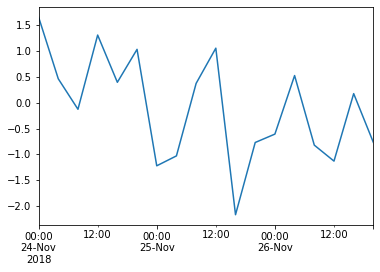

In [25]:
ts = Series(np.random.randn(18), index=ind)
ts.plot()

<AxesSubplot:>

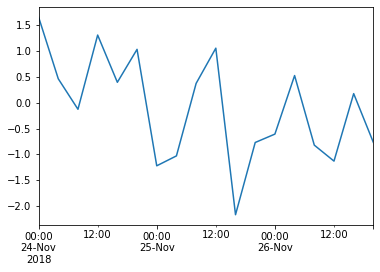

In [26]:
ts.cumsum()
ts.plot()

## Assignment
1. Please display time series data from today to the end of the year at the start of each month.  
  
2. Please display a slice of the same time series object during summer months.